# Exercises - GEO4902-02 - Data Assimilation

Kjersti Stangeland, Fall 2024

# Exercise 02-01 -  Analyse the impact of the upper air data assimilation

The script gives you a framework to assess two different forecasts. Note, forecasts are available with initialization dates every 3 hours, i.e. we assimilate every three hours (rapid update cycling), but we do full forecasts only every 6 hours. You can thus analyse two different forecasts (i.e. which were initialized at different times) for a specific time.

- Utilize the script to plot the impact of data assimilation on a point forecast. That means plotting two or more forecasts with different initialization times in one figure.
- Use also at least 2 additional variables relevant to a weather forecast. 

In [1]:
import xarray as xr
import numpy as np
import cartopy as cy
from matplotlib import pyplot as plt
import cmocean.cm as cmo

#### Fill in the dates and hours for the exercise

In [2]:
year =  '2023'
day  =  '07'
month = '08'

hour_1  ='12'  # full forecast
hour_2  ='15'  # rapid update

url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/'+year+'/'+month+'/'+day+'/arome_arctic_det_2_5km_'+year+month+day+'T'+hour_1+'Z.nc'
forecast_1 = xr.open_dataset(url)

url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/'+year+'/'+month+'/'+day+'/arome_arctic_det_2_5km_'+year+month+day+'T'+hour_2+'Z.nc'
forecast_2 = xr.open_dataset(url)

### Find a specific point and plot the forecast. 
###### Note AROME Arctic is on an irregular grid, so the xarray.sel functionality does not work:

In [3]:
def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    x, y = np.where(c == np.min(c))
    x=int(x)
    y=int(y)
   
    return (x,y)

In [4]:
[y_loc,x_loc] = findindex(forecast_1['latitude'], forecast_1['longitude'],69.6492, 18.9553 ) # For example for Tromsø

/var/folders/tp/bn0hk5sx7fq7r171hlv9tzq40000gn/T/ipykernel_83968/4093572236.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x=int(x)
/var/folders/tp/bn0hk5sx7fq7r171hlv9tzq40000gn/T/ipykernel_83968/4093572236.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y=int(y)


#### For example temperature forecasts at a specific model level

In [5]:
tml_point_forecast_1 = forecast_1['air_temperature_ml'].isel(hybrid=-1, y = y_loc, x=x_loc)
tml_point_forecast_2 = forecast_2['air_temperature_ml'].isel(hybrid=-1, y = y_loc, x=x_loc)

In [6]:
windspeed_point_forecast_1 = forecast_1['wind_speed'].isel(height7 = 0, y = y_loc, x = x_loc)
windspeed_point_forecast_2 = forecast_2['wind_speed'].isel(height7 = 0, y = y_loc, x = x_loc)

In [7]:
acc_precip_point_forecast_1 = forecast_1['precipitation_amount_acc'].isel(height0=0, y=y_loc, x=x_loc)
acc_precip_point_forecast_2 = forecast_2['precipitation_amount_acc'].isel(height0=0, y=y_loc, x=x_loc)

Text(0.5, 0.98, 'Point forecast, temperature at bottom model layer')

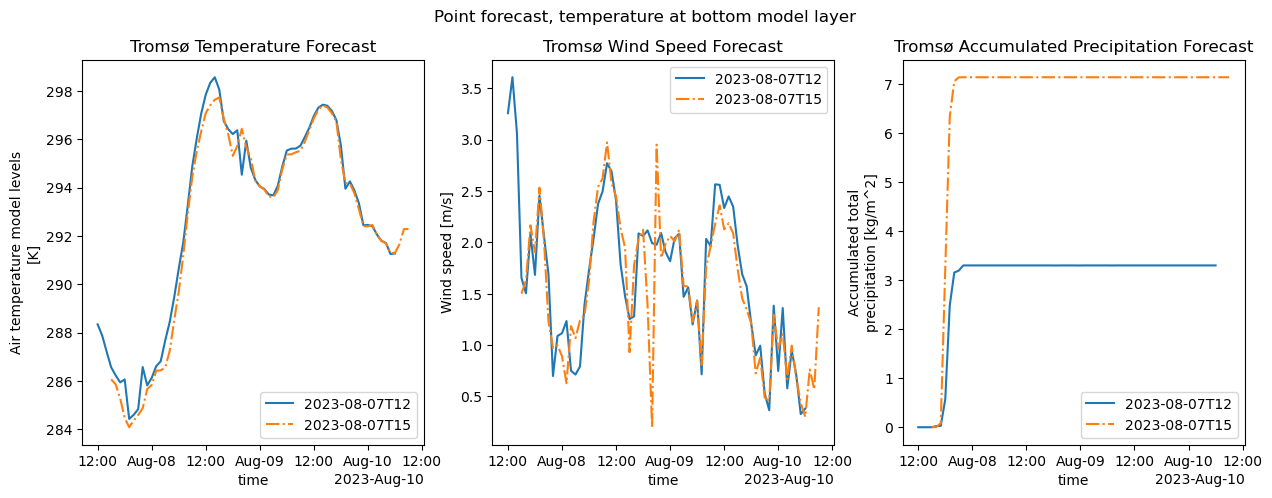

In [12]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

tml_point_forecast_1.plot.line(ax=ax[0], x='time', linestyle='-', label=(np.datetime_as_string(tml_point_forecast_1.time.isel(time=0), unit='h')))
tml_point_forecast_2.plot.line(ax=ax[0],x='time', linestyle='-.', label=(np.datetime_as_string(tml_point_forecast_2.time.isel(time=0), unit='h')))

windspeed_point_forecast_1.plot.line(ax=ax[1], x='time', linestyle='-', label=(np.datetime_as_string(tml_point_forecast_1.time.isel(time=0), unit='h')))
windspeed_point_forecast_2.plot.line(ax=ax[1], x='time', linestyle='-.', label=(np.datetime_as_string(tml_point_forecast_2.time.isel(time=0), unit='h')))

acc_precip_point_forecast_1.plot.line(ax=ax[2], x='time',linestyle='-',label=(np.datetime_as_string(tml_point_forecast_1.time.isel(time=0), unit='h')))
acc_precip_point_forecast_2.plot.line(ax=ax[2], x='time',linestyle='-.',label=(np.datetime_as_string(tml_point_forecast_2.time.isel(time=0), unit='h')))


ax[0].set_title("Tromsø Temperature Forecast")
ax[1].set_title("Tromsø Wind Speed Forecast")
ax[2].set_title("Tromsø Accumulated Precipitation Forecast")

ax[0].legend()
ax[1].legend()
ax[2].legend()

fig.suptitle('Point forecast, temperature at bottom model layer')

__Answers:__
- We see that the forecast generated at 12 UTC differs from the one from 15 UTC as the latter has incorporated newly made observations into its forecast. The wind speed deviates quite a bit after 24 hours. When looking at the precipitation it seems that there has been a precipitation event not captured by the prior model run, and has been observed and therefore assimilated into the forecast. 
- I see this as the forecast generated at 12 UTC only had "knowledge" of the prior state and observations, whereas the one from 15 UTC has incorporated observations made between 12-15 UTC (?). 

### Plot forecast on a map

- The impact of the data assimilation can be described by the difference between the background xB and the analysis xA. In order to find the background xB, think about what goes into the data assimilation procedure from the previous forecast? 
- Then you can utilize the script to plot a 2D-map and plot the difference xB - xA. Plot maps for the different variables in (1) and for different levels.

__Answers__
- Background would be the 12 UTC forecast, valid at 15 UTC and the analysis is from the 15 UTC forecast. SO 12 UTC forecast is the previous model run here, and is therefore the background for the analysis done in the 15 UTC forecast where observations has also been incorporated. 
- So the difference between 12 UTC and 15 UTC gives us the impact of the observations in the new forecast. 

In [13]:
# Bottom model layer
diff_temp_bottom = (forecast_1['air_temperature_ml'].isel(hybrid=-1, time = 3) - forecast_2['air_temperature_ml'].isel(hybrid=-1, time = 0))
diff_precip = forecast_1['precipitation_amount_acc'].isel(height0=0, time = 3) - forecast_2['precipitation_amount_acc'].isel(height0=0, time = 0)
diff_windspeed = forecast_1['wind_speed'].isel(height7 = 0, time=3) - forecast_2['wind_speed'].isel(height7 = 0, time=0)

# Uppermost model layer
diff_temp_top = (forecast_1['air_temperature_ml'].isel(hybrid=0, time = 3) - forecast_2['air_temperature_ml'].isel(hybrid=0, time = 0))


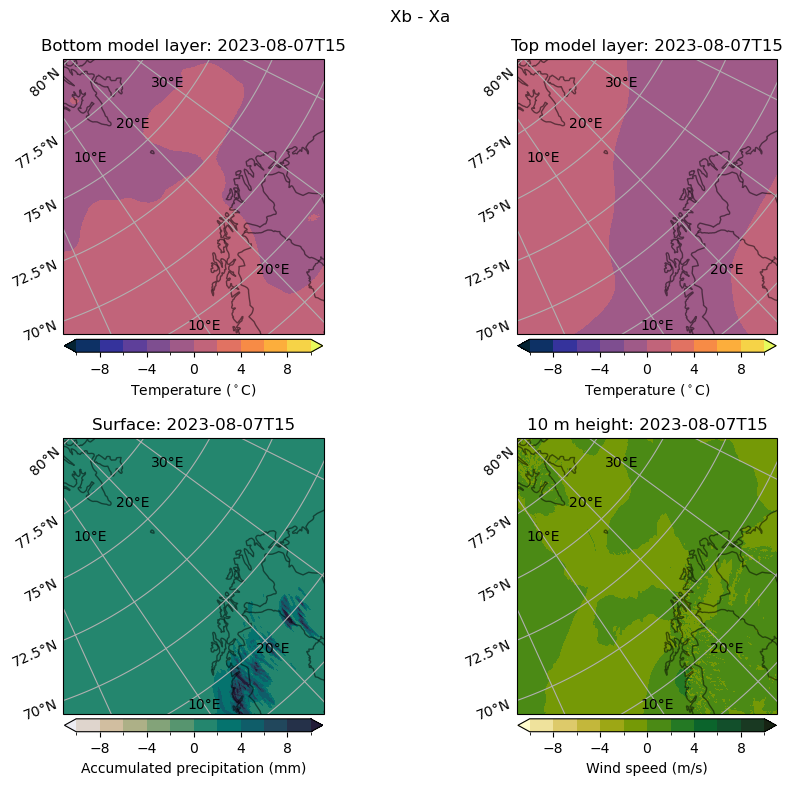

In [15]:
lat0=69.6492; lon0=18.9553 

projection = cy.crs.LambertConformal(central_longitude =forecast_1.projection_lambert.longitude_of_central_meridian,
                                       central_latitude  =forecast_1.projection_lambert.latitude_of_projection_origin,
                                       standard_parallels = forecast_1.projection_lambert.standard_parallel)

fig, ax = plt.subplots(2,2, subplot_kw={'projection':projection}, figsize=[10, 8])

# plot cosmetics
for a in ax.flat:
    a.add_feature(cy.feature.COASTLINE, alpha=0.5)
    a.add_feature(cy.feature.BORDERS, alpha=0.5)
    gl = a.gridlines(draw_labels=True)
    gl.top_labels=False
    gl.right_labels=False
    a.set_extent([lon0-3, lon0+3, lat0-5, lat0+10], cy.crs.PlateCarree())

timestamp = np.datetime_as_string(forecast_1.time.isel(time=3), unit="h")

diff_temp_bottom.plot(ax=ax[0, 0], x='longitude', y='latitude', transform=cy.crs.PlateCarree(), cmap=cmo.thermal, extend='both',  levels=np.arange(-10,12,2),cbar_kwargs={'orientation':'horizontal','label':'Temperature ($^\circ$C)', 'shrink':0.5, 'pad':0.015})
ax[0, 0].set(title= f'Bottom model layer: {timestamp}')

diff_temp_top.plot(ax=ax[0, 1], x='longitude', y='latitude', transform=cy.crs.PlateCarree(), cmap=cmo.thermal, extend='both', levels=np.arange(-10,12,2),cbar_kwargs={'orientation':'horizontal','label':'Temperature ($^\circ$C)', 'shrink':0.5, 'pad':0.015})
ax[0, 1].set(title= f'Top model layer: {timestamp}')

diff_precip.plot(ax=ax[1, 0], x='longitude', y='latitude', cmap=cmo.rain, extend='both', transform=cy.crs.PlateCarree(),levels=np.arange(-10,12,2),cbar_kwargs={'orientation':'horizontal','label':'Accumulated precipitation (mm)', 'shrink':0.5, 'pad':0.015})
ax[1, 0].set(title= f'Surface: {timestamp}')

diff_windspeed.plot(ax=ax[1, 1], x='longitude', y='latitude', cmap=cmo.speed, extend='both', transform=cy.crs.PlateCarree(), levels=np.arange(-10,12,2),cbar_kwargs={'orientation':'horizontal','label':'Wind speed (m/s)', 'shrink':0.5, 'pad':0.015})
ax[1, 1].set(title= f'10 m height: {timestamp}')

fig.suptitle('Xb - Xa')
plt.tight_layout()

__Answers__:
- So the maps above show the impact of the data assimilation as the difference between the background and the analysis. Where the difference is positive, the background value was larger than the analysis. Where the difference is negative, the analysis was greater than the background value. Therefore I think that where the absolute value of the difference is largest, the impact of the data assimilation has been the greatest. The sign of the difference tells us in which direction the data assimilation (the observations) shifted the next forecast.
- As for the different model levels I chose to plot for the uppermost model level and the bottom model level, which I interpret at TOA and surface. The magnitude of the difference is the same for both levels, although they are placed differently. Why? I do not know at this current moment.  